# Import library

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Import the dataset

Fetch from sklearn library

In [2]:
faces = fetch_lfw_people(min_faces_per_person=70)
# print(faces.DESCR)

Print the total dataset size

In [3]:
n_samples, h, w = faces.images.shape
n_features = faces.data.shape[1]
n_classes = len(faces.target_names)

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 1288
n_features: 2914
n_classes: 7


# Preprocessing

Visualize some images from the dataset

Some faces in the dataset:


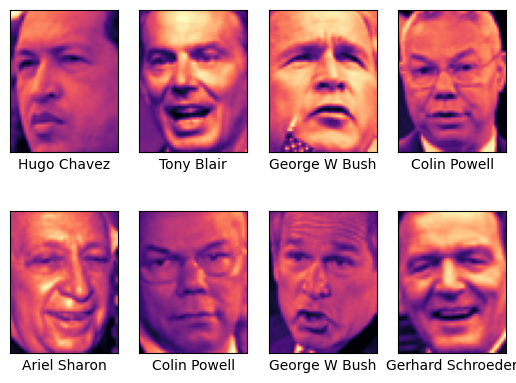

In [4]:
figure, splits = plt.subplots(2, 4)
print("Some faces in the dataset:")
for i, splits in enumerate(splits.flat):
    splits.imshow(faces.images[i], cmap='magma')
    splits.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Split into a training set and a test set (80% for training and 20% for testing)

In [5]:
X = faces.data # data
y = faces.target # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model


Apply PCA for dimensionality reduction

In [17]:
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)

# pca = PCA(n_components=150, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Train the Naive Bayes Classifier

In [18]:
model = GaussianNB()

Fit the model

In [19]:
model.fit(X_train_pca, y_train)

GaussianNB()

# Prediction

In [24]:
y_pred = model.predict(X_test_pca)

# Evaluation

Calculate precision, recall, accuracy and f1-score

In [25]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.69
Precision: 0.70
Recall: 0.69
F1 Score: 0.68


Generate and print classification report

In [26]:
class_report = classification_report(y_test, y_pred, digits=2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.45      0.42        11
           1       0.67      0.55      0.60        47
           2       0.87      0.59      0.70        22
           3       0.70      0.87      0.77       119
           4       0.69      0.58      0.63        19
           5       0.83      0.38      0.53        13
           6       0.68      0.56      0.61        27

    accuracy                           0.69       258
   macro avg       0.69      0.57      0.61       258
weighted avg       0.70      0.69      0.68       258



Quantitative evaluation of the model quality on the test set

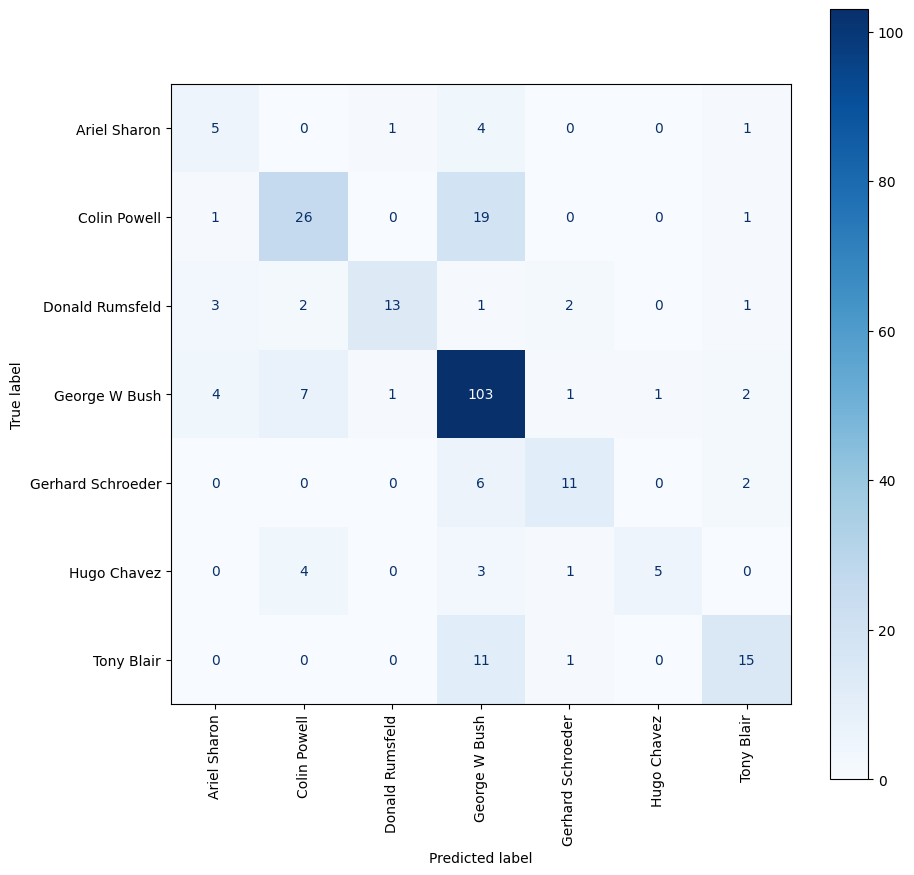

In [27]:
matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=faces.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues')
plt.show()

Highlight classification errors with images




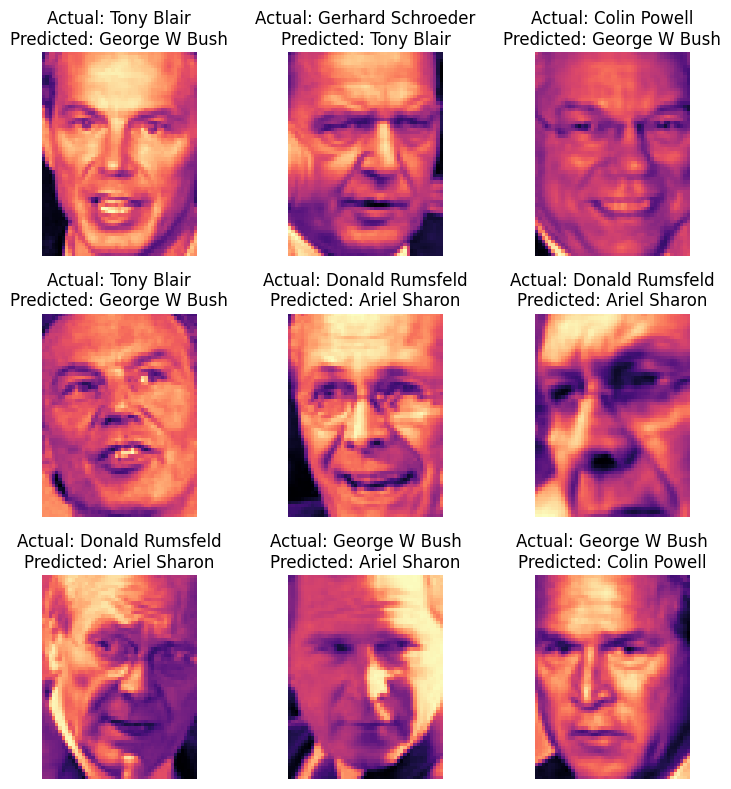


178 are classified as correct and 80 are classified as incorrect!


In [28]:
incorrect = 0
length = len(y_pred)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:  # if y_pred and actual values are not equal
        prediction_name = faces.target_names[y_pred[i]]  # Getting the predicted name
        actual_name = faces.target_names[y_test[i]]  # Getting the actual name
        incorrect += 1
        if incorrect <= 9:  # Display up to 9 misclassified images
            ax = axes[incorrect - 1]
            ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap='magma')
            ax.set_title(f"Actual: { actual_name }\nPredicted: {prediction_name}")
            ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{length-incorrect} are classified as correct and {incorrect} are classified as incorrect!")